# Opencv Basics

* Read an image from file (using `cv::imread`)
* Write an image to a file (using `cv::imwrite`)
* Display an image in an OpenCV window (using `cv::imshow`)
* Display an image using matplotlib
* Access pixel values and modify them
* Access image properties
* Set a Region of Interest (ROI)
* Split and merge images

* Learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.
* Learn these functions: `cv.add()`, `cv.addWeighted()`, etc.

## OpenCV
* How to install using conda
    * `conda install -c conda-forge py-opencv`

* Official Opencv doumentation
    * https://docs.opencv.org/4.4.0/index.html

As a first step, the OpenCV python library is imported.
The proper way to do this is to additionally assign it the name cv, which is used in the following to reference the library.

In [1]:
import os
import cv2 as cv # OpenCV
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

# %matplotlib qt
# %matplotlib inline

## Basic IO


* Loads an image from a file.
    * `retval = cv.imread(filename[, flags])`
    * flags
        * `cv.IMREAD_COLOR`: loads the image in the BGR 8-bit format. This is the default that is used here.
        * `cv.IMREAD_UNCHANGED`: loads the image as is (including the alpha channel if present)
        * `cv.IMREAD_GRAYSCALE`: loads the image as an intensity one


* Saves an image to a specified file.
    * `retval = cv.imwrite( filename, img[, params])`

In [2]:
# Read an image (read "starry_night.jpg")
img = cv.imread('./resources/orange.jpg')
print(type(img)) # Returns Numpy ndarray

# check if the image was loaded correctly.
if img is None:
    raise RuntimeError("Could not read the image.")


# Write an image (save img as 'tmp.png')
cv.imwrite('./resources/tmp.png', img)


# check if the image file was created
assert os.path.exists('./resources/tmp.png')


<class 'numpy.ndarray'>


## Display an image in an OpenCV window

The image is shown using a call to the `cv.imshow` function.
The first argument is the title of the window and the second argument is the `cv.Mat` object that will be shown.

Because we want our window to be displayed until the user presses a key (otherwise the program would end far too quickly), we use the cv::waitKey function whose only parameter is just how long should it wait for a user input (measured in milliseconds).
Zero means to wait forever.
The return value is the key that was pressed.

* Displays OpenGL 2D texture in the specified window.
    * `cv.imshow(winname, mat)`


**주의: 이번 실습은 서버에서 진행하기 때문에 적절한 display port가 설정되어 있지 않습니다. 아래 코드는 참고만 해주시고 이번 실습에서는 matplotlib의  imshow만 사용하겠습니다.**

In [3]:
# show image using OpenCV
# cv.imshow("Display window", img)
# k = cv.waitKey(0) # press any key to continue
# cv.destroyAllWindows() # close window

## Display an image using matplotlib

The image is shown using a call to the `matplotlib.pyplot.imshow` function.
By default, OpenCV read color image as BGR format.
If you want to use OpenCV with other libraries that use RGB format, you need to convert images to RGB format to BGR format.

* Display an image using matplotlib
    * `matplotlib.pyplot.imshow(X)`

* convert BGR format image to RGB format image
    * `cv.cvtColor(img, cv.COLOR_BGR2RGB)`

(<AxesSubplot:title={'center':'RGB'}>,
 Text(0.5, 1.0, 'RGB'))

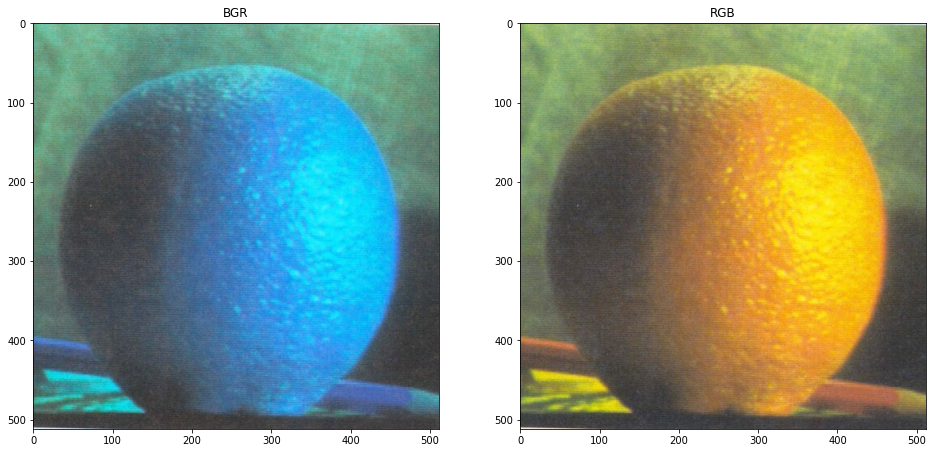

In [8]:
# show image using matplotlib
plt.subplot(1,2,1), plt.imshow(img), plt.title('BGR')
plt.subplot(1,2,2), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('RGB') # need to convert BGR format image to RGB format image

## Accessing and Modifying pixel values

You can access a pixel value by its row and column coordinates.
For BGR image, it returns an array of Blue, Green, Red values.
For grayscale image, just corresponding intensity is returned.

[157 166 200]
157


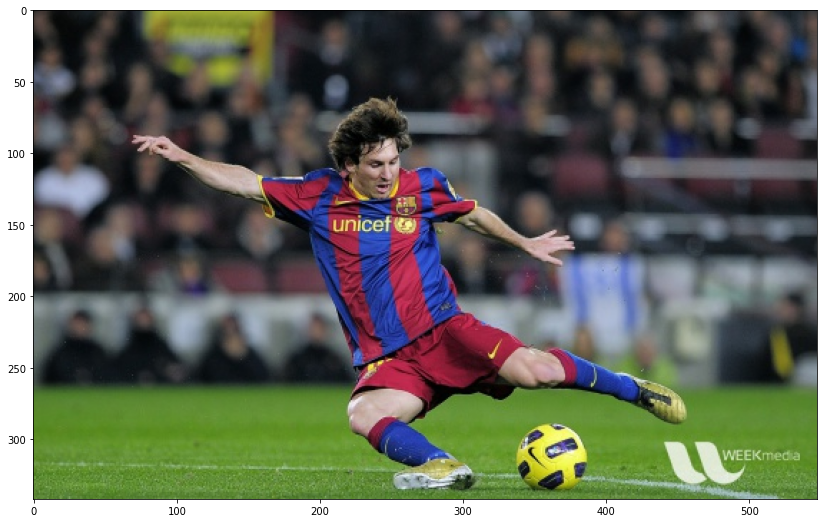

In [8]:
img = cv.imread('./resources/messi5.jpg')

px = img[100,100]
print( px )

# accessing only blue pixel
blue = img[100,100,0]
print( blue )

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Accessing Image Properties

Image properties include number of rows, columns, and channels; type of image data; number of pixels; etc.

* Note
    * If an image is grayscale, the tuple returned contains only the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color.


In [3]:
# The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color):
print( img.shape )

# Total number of pixels is accessed by img.size:
print( img.size )

# Image datatype is obtained by `img.dtype`:
print( img.dtype )

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img_gray.shape)

(512, 512, 3)
786432
uint8
(512, 512)


## Image ROI

Sometimes, you will have to play with certain regions of images.
For eye detection in images, first face detection is done over the entire image.
When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces) and performance (because we search in a small area).

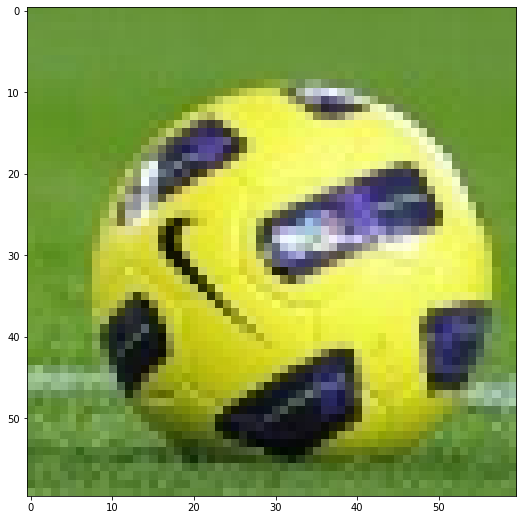

In [20]:
ball = img[280:340, 330:390]

plt.imshow(cv.cvtColor(ball, cv.COLOR_BGR2RGB))

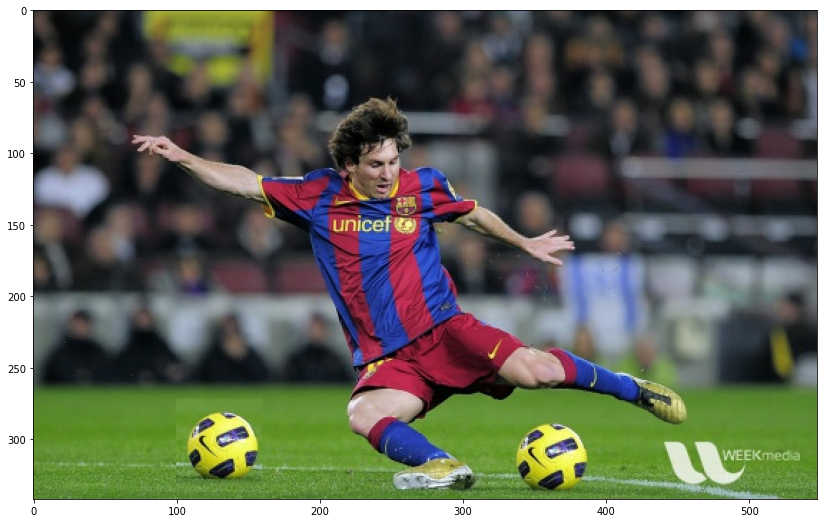

In [21]:
img[272:332, 100:160] = ball
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Splitting and Merging Image Channels

Sometimes you will need to work separately on the B,G,R channels of an image. In this case, you need to split the BGR image into single channels.
In other cases, you may need to join these individual channels to create a BGR image.

In [4]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

## Making Borders for Images (Padding)

If you want to create a border around an image, something like a photo frame, you can use `cv.copyMakeBorder`.
But it has more applications for convolution operation, zero padding etc.
This function takes following arguments

* Forms a border around an image.
    * `dst = cv.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]])`
    * src - input image
    * top, bottom, left, right - border width in number of pixels in corresponding directions
    * borderType - Flag defining what kind of border to be added. It can be following types:
        * cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
        * cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
        * cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
        * cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
        * cv.BORDER_WRAP - wrap around border, it will look like this : cdefgh|abcdefgh|abcdefg
    * value - Color of border if border type is cv.BORDER_CONSTANT

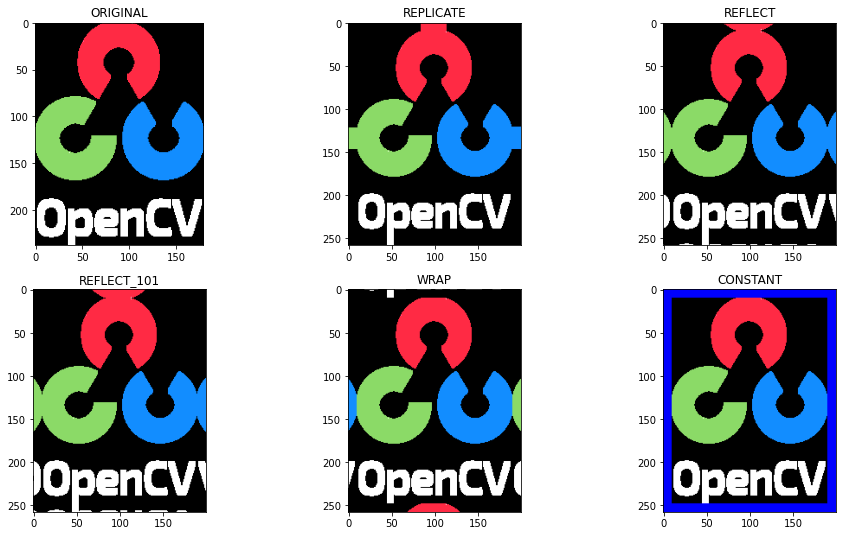

In [6]:
BLUE = [0,0,255]

img1 = cv.imread('./resources/opencv-logo-white.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant),plt.title('CONSTANT')
plt.show()

## Image Addition
You can add two images with the OpenCV function, `cv.add()`, or simply by the numpy operation `res = img1 + img2`. 
Both images should be of same depth and type, or the second image can just be a scalar value.

* Note
    * There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation. 



In [25]:
x = np.uint8([250])
y = np.uint8([10])

print( cv.add(x,y) ) # 250+10 = 260 => 255

print( x+y )          # 250+10 = 260 % 256 = 4

[[255]]
[4]


## Bitwise Operations
This includes the bitwise AND, OR, NOT, and XOR operations. 
They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI's, and etc. 
Below we will see an example of how to change a particular region of an image.

I want to put the OpenCV logo above an image. 
If I add two images, it will change the color. 
If I blend them, I get a transparent effect. But I want it to be opaque. 
If it was a rectangular region, I could use ROI as we did in the last chapter. 
But the OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as shown below:

(<AxesSubplot:title={'center':'Mask'}>,
 Text(0.5, 1.0, 'Mask'))

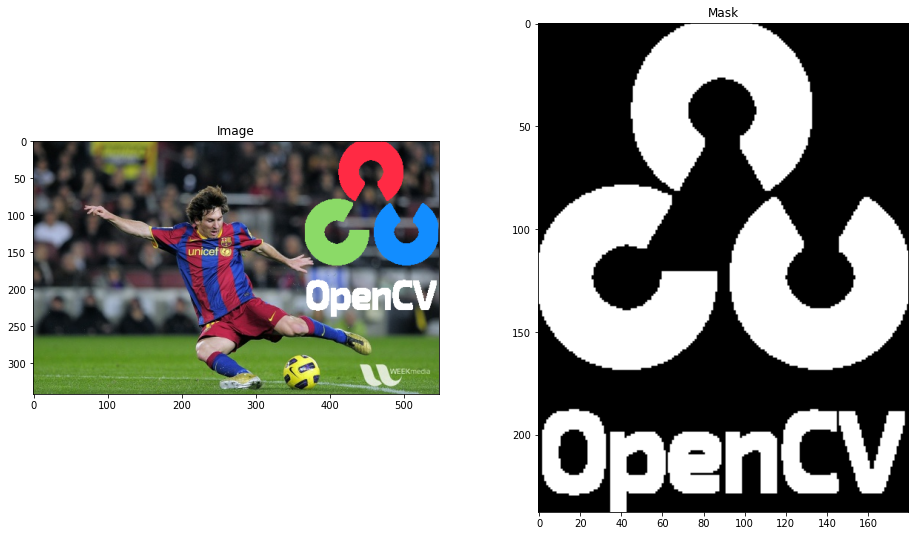

In [7]:
# Load two images
img1 = cv.imread('./resources/messi5.jpg')
img2 = cv.imread('./resources/opencv-logo-white.png')

# I want to put logo on top-right corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, -(cols+1):-1]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)

mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
# img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img1_bg = cv.bitwise_and(roi,np.repeat(mask_inv, 3, axis = 1).reshape(roi.shape))

# Take only region of logo from logo image.
# img2_fg = cv.bitwise_and(img2,img2,mask = mask)
img2_fg = cv.bitwise_and(img2,np.repeat(mask, 3, axis = 1).reshape(roi.shape))

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, -(cols+1):-1] = dst

# dst = cv.hconcat(mask,img1)
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
plt.subplot(1,2,1),plt.imshow(img1), plt.title('Image')
plt.subplot(1,2,2),plt.imshow(mask,'gray'), plt.title('Mask')
